In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [2]:
mapbox_access_token = 'pk.eyJ1IjoiYWxleGptYWJseSIsImEiOiJjandud3Z5MHIwaDQ1M3pvNjkybDk2MHpjIn0.f4-5gFayx4aj1to4Hjy_Fg'

In [3]:
df = pd.read_csv('Zip_long_lat.csv', index_col = 0)
data_df = pd.read_csv('SFR_processed.csv', index_col = 0)


In [4]:
data_df = data_df.dropna(axis=1)

In [5]:
zips = data_df.columns
df = df[df['Zip'].isin(zips)]

In [6]:
df['Zip'] = df['Zip'].astype(str)

In [7]:
#there is a column missing from our zips info, lets identify it
print(set(list(zips))^set(list(df["Zip"])))


{'78633'}


In [8]:
#As it's only one value I did a quick manual search and found the coordinates, so they can be entered by hand

missing = pd.DataFrame(index=np.arange(0, 1), columns=('Zip', 'Latitude', 'Longitude'))
missing.iloc[0] = ['78633', 30.7217, -97.7525]

In [9]:
df = df.append(missing, ignore_index=True)

In [17]:
#make initial traces to update

def make_map(data_df, zips):
    data_dict = []
    
    for z in data_df.columns:
        d = dict(type='scattermapbox',
                 lat= [zips[zips['Zip']==z]['Latitude'].item()],
                 lon= [zips[zips['Zip']==z]['Longitude'].item()],
                 mode = 'marker',
                 marker = dict(size = 0, color = 'black'))
        data_dict.append(d)
    return(data_dict)
                

In [18]:
def get_frames(data_df, zips, k):
    t_dict = []
    for z in data_df.columns:
        
        t = dict(lat= [zips[zips['Zip']==z]['Latitude'].item()],
                 lon= [zips[zips['Zip']==z]['Longitude'].item()],
                 marker = dict(size = data_df[z][k]/30, color = 'black'))
        t_dict.append(t)
    return(t_dict)


In [19]:
## My initial figure needs  70 traces, so that each one can be udated. Write new loop for that:

data = make_map(data_df, df)

layout = dict(
    autosize=False,
    hovermode='closest',
    mapbox=dict(accesstoken=mapbox_access_token,
                bearing=0,
                center=dict(lat=30.26,
                            lon=-97.74
                            ),
                pitch=40, #tilt map
                zoom=9.3,
                style='light'
                ),
    width=900,
    height=900, 
            )

In [20]:
frames = [dict(name = 'fname{}'.format(k),
               data = get_frames(data_df, df, k),
              traces = list(range(0,71)))
          for k in range(1,data_df.shape[0])]


In [21]:
sliders=[dict(steps= [dict(method= 'animate',
                           args= [[ 'frame{}'.format(k) ],
                                  dict(mode= 'immediate',
                                  frame= dict( duration=100, redraw= False ),
                                           transition=dict( duration= 0)
                                          )
                                    ],
                            label='{}'.format(data_df.index[k])
                             ) for k in range((data_df.shape[0]))], 
                transition= dict(duration= 0 ),
                x=0,#slider starting position  
                y=0, 
                currentvalue=dict(font=dict(size=14), 
                                  prefix='Date: ', 
                                  visible=True, 
                                  xanchor= 'center'
                                 ),  
                len=1.0)#slider length)
           ]

In [22]:
layout.update(updatemenus=[dict(type='buttons', showactive=False,
                                y=0,
                                x=1.05,
                                xanchor='right',
                                yanchor='top',
                                pad=dict(t=0, r=10),
                                buttons=[dict(label='Play',
                                              method='animate',
                                              args=[None, 
                                                    dict(frame=dict(duration=100, 
                                                                    redraw=False),
                                                         transition=dict(duration=0),
                                                         fromcurrent=True,
                                                         mode='immediate'
                                                        )
                                                   ]
                                             )
                                        ]
                               )
                          ],
              sliders=sliders)

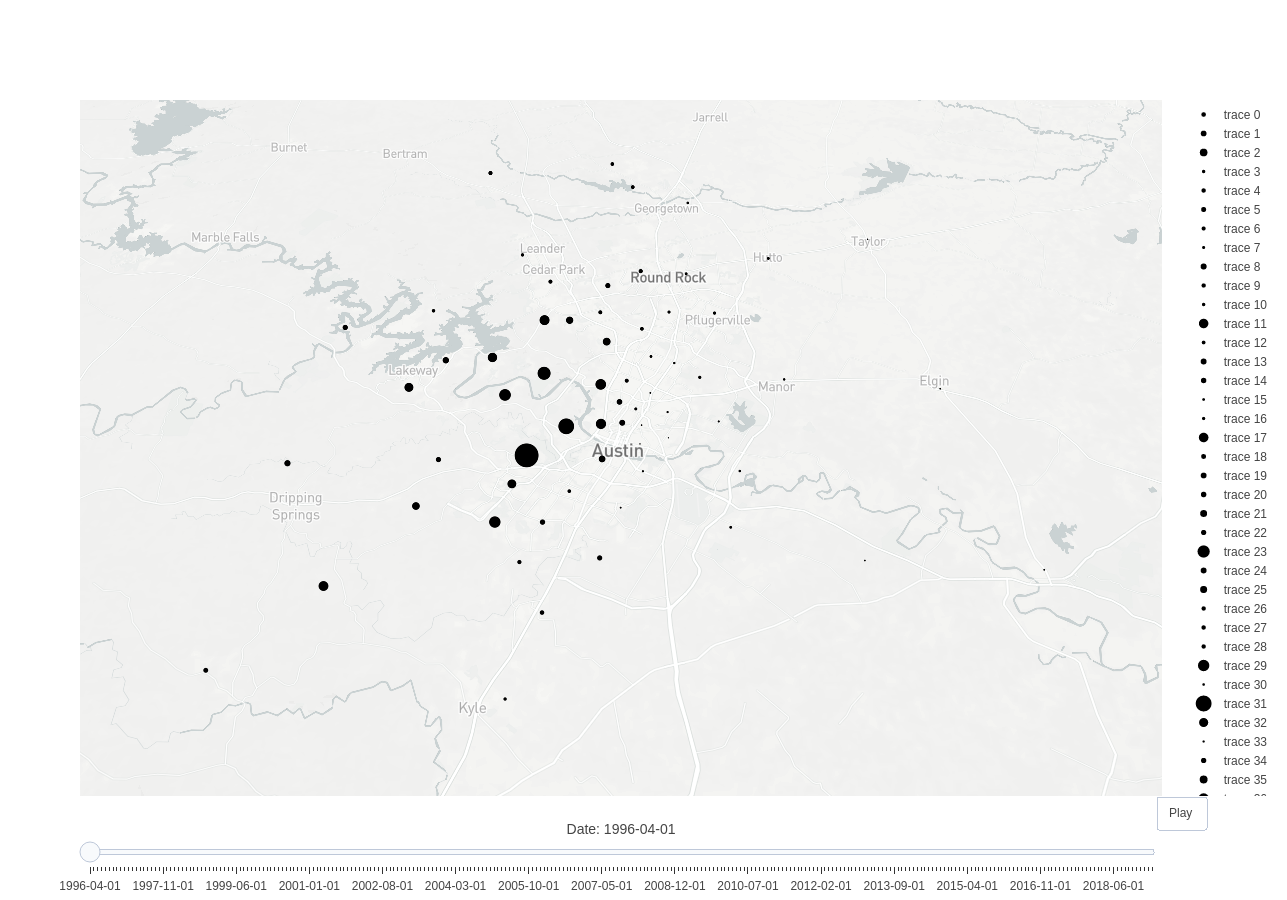

In [23]:
fig=dict(data=data, layout=layout, frames=frames)
iplot(fig, validate=False)